# Make Main Figure

In [1]:
import geopandas as gpd
from gadm import GADMDownloader

import rasterio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
import datetime
import glob
import time

from blackmarblepy.bm_raster import bm_raster
from blackmarblepy.bm_extract import bm_extract

In [2]:
if os.path.exists("/Users/robmarty/Desktop/bearer_bm.csv"):
    bearer = pd.read_csv("/Users/robmarty/Desktop/bearer_bm.csv")['token'][0]
else:
    bearer == "BEARER TOKEN HERE"

In [3]:
downloader = GADMDownloader(version="4.0")

country_name = "United States"
ad_level = 1
roi_sf = downloader.get_shape_data_by_country_name(country_name=country_name, ad_level=ad_level)

In [33]:
roi_sub_sf = roi_sf[roi_sf['NAME_1'] != "Hawaii"]
roi_sub_sf = roi_sub_sf[roi_sub_sf['NAME_1'] != "Alaska"]

In [34]:
## Download data
r_annual_121722 = bm_raster(roi_sf = roi_sub_sf,
                            product_id = "VNP46A4",
                            date = 2022, 
                            bearer = bearer,
                            quiet = False)

Downloading: VNP46A4.A2022001.h05v04.001.2023081121156.h5
Downloading: VNP46A4.A2022001.h05v05.001.2023081122132.h5
Downloading: VNP46A4.A2022001.h06v04.001.2023081121250.h5
Downloading: VNP46A4.A2022001.h06v05.001.2023081121053.h5
Downloading: VNP46A4.A2022001.h07v04.001.2023081121159.h5
Downloading: VNP46A4.A2022001.h07v05.001.2023081122001.h5
Downloading: VNP46A4.A2022001.h07v06.001.2023081121317.h5
Downloading: VNP46A4.A2022001.h08v04.001.2023081122227.h5
Downloading: VNP46A4.A2022001.h08v05.001.2023081124132.h5
Downloading: VNP46A4.A2022001.h08v06.001.2023081121553.h5
Downloading: VNP46A4.A2022001.h09v04.001.2023081221112.h5
Downloading: VNP46A4.A2022001.h09v05.001.2023081222037.h5
Downloading: VNP46A4.A2022001.h09v06.001.2023081121748.h5
Downloading: VNP46A4.A2022001.h10v04.001.2023081122332.h5
Downloading: VNP46A4.A2022001.h10v05.001.2023081121938.h5
Downloading: VNP46A4.A2022001.h10v06.001.2023081121953.h5
Downloading: VNP46A4.A2022001.h11v04.001.2023081220744.h5


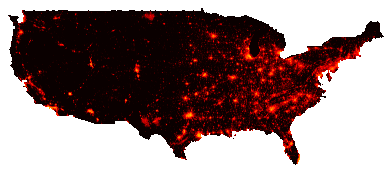

In [57]:
r_np = r_annual_121722.read(1)
r_np = np.log(r_np+1)

plt.imshow(r_np, cmap='hot')
plt.tight_layout()
plt.axis("off")
plt.savefig("../ntl_usa.png", dpi = 500, bbox_inches='tight')